## Data Analysis and Preprocessing

In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
creditcard_df = pd.read_csv('../data/creditcard.csv')
fraud_data_df = pd.read_csv('../data/Fraud_Data.csv')
ip_country_df = pd.read_csv('../data/IpAddress_to_Country.csv')

In [4]:
creditcard_df.head()
fraud_data_df.head()
ip_country_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## Checking for the Missing values

In [6]:
# check for missing values
print("Checking the Missing value for the Creditcard")
print(creditcard_df.isnull().sum())
print("Checking the Missing value for the Fraud_Data")
print(fraud_data_df.isnull().sum())
print("Checking the Missing value for the IP Address of the Country")
print(ip_country_df.isnull().sum())

Checking the Missing value for the Creditcard
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Checking the Missing value for the Fraud_Data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Checking the Missing value for the IP Address of the Country
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


## Data Cleaning

In [7]:
# Remove duplicates
creditcard_df.drop_duplicates(inplace=True)
fraud_data_df.drop_duplicates(inplace=True)
ip_country_df.drop_duplicates(inplace=True)

In [9]:
# Correct data types for Fraud_Data.csv
fraud_data_df['signup_time'] = pd.to_datetime(fraud_data_df['signup_time'])
fraud_data_df['purchase_time'] = pd.to_datetime(fraud_data_df['purchase_time'])
fraud_data_df['user_id'] = fraud_data_df['user_id'].astype(int)
fraud_data_df['device_id'] = fraud_data_df['device_id'].astype('category')
fraud_data_df['ip_address'] = fraud_data_df['ip_address'].astype(int)
fraud_data_df['purchase_value'] = fraud_data_df['purchase_value'].astype(float)
fraud_data_df['source'] = fraud_data_df['source'].astype('category')
fraud_data_df['browser'] = fraud_data_df['browser'].astype('category')
fraud_data_df['sex'] = fraud_data_df['sex'].astype('category')
fraud_data_df['age'] = fraud_data_df['age'].astype(int)
fraud_data_df['class'] = fraud_data_df['class'].astype(int)

In [10]:
# Correct data types for creditcard.csv
creditcard_df['Amount'] = creditcard_df['Amount'].astype(float)
creditcard_df['Class'] = creditcard_df['Class'].astype(int)

In [12]:
# Check the data types
print(ip_country_df.dtypes)


lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [13]:
# Convert IPs to integers if they are floats
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(int)
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype(int)

In [14]:
# Convert IP addresses to integer format
import ipaddress
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['country'] = ip_country_df['country'].astype('category')


## EDA

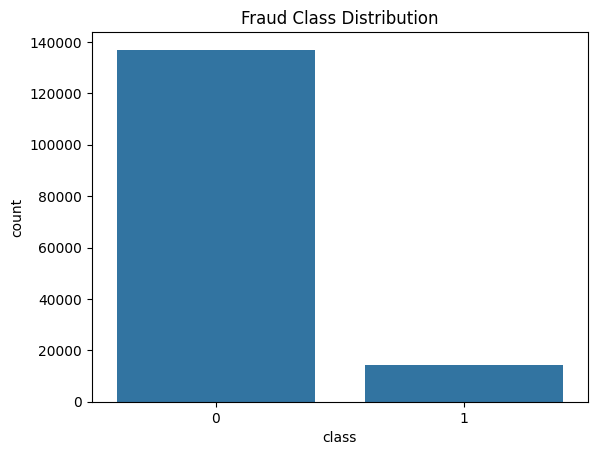

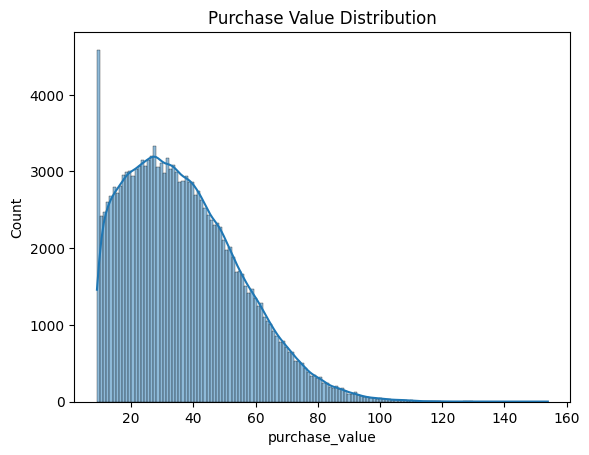

In [16]:
# Univariate analysis for fraud class distribution
sns.countplot(x='class', data=fraud_data_df)
plt.title('Fraud Class Distribution')
plt.show()

# Distribution of purchase value
sns.histplot(fraud_data_df['purchase_value'], kde=True)
plt.title('Purchase Value Distribution')
plt.show()


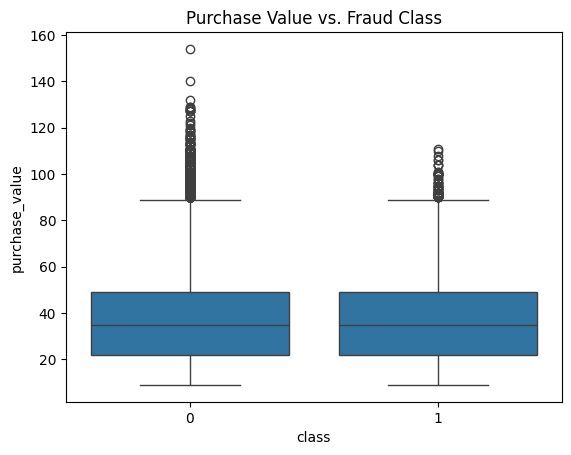

In [17]:
# Bivariate analysis: Purchase value vs. Fraud class
sns.boxplot(x='class', y='purchase_value', data=fraud_data_df)
plt.title('Purchase Value vs. Fraud Class')
plt.show()


## Merge Datasets for Geolocation Analysis

In [18]:
# Convert ip_address to integer format in Fraud_Data.csv
fraud_data_df['ip_address'] = fraud_data_df['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [24]:
import pandas as pd
import ipaddress


# Ensure IP addresses are integers
fraud_data_df['ip_address'] = fraud_data_df['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Initialize a list to store matching countries
matched_countries = []

# Loop through each row in the fraud_data_df
for index, row in fraud_data_df.iterrows():
    ip = row['ip_address']
    # Check if this IP falls within any of the ranges in ip_country_df
    matched_country = ip_country_df[(ip_country_df['lower_bound_ip_address'] <= ip) & 
                                     (ip_country_df['upper_bound_ip_address'] >= ip)]
    
    if not matched_country.empty:
        # If there are matches, get the first one (or handle multiple matches as needed)
        matched_countries.append(matched_country['country'].values[0])
    else:
        matched_countries.append(None)  # Append None if no match is found

# Add the matched countries back to the fraud_data_df
fraud_data_df['country'] = matched_countries


In [29]:
# Display the first few rows of the merged DataFrame
print(fraud_data_df.head())

# Display specific columns of interest
print(fraud_data_df[['user_id', 'ip_address', 'country']].head())

# Check for rows where the country is missing
missing_country_df = fraud_data_df[fraud_data_df['country'].isnull()]
print("Rows with missing countries:")
print(missing_country_df)


# Get the number of rows in the DataFrame
print("Number of rows in the merged DataFrame:", len(fraud_data_df))

# Save the merged DataFrame to a CSV file
fraud_data_df.to_csv('merged_fraud_data.csv', index=False)


   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11            34.0   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54            16.0   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45            15.0   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50            44.0   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53            39.0   

       device_id source browser sex  age  ip_address  class  key  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0    1   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0    1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1    1   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0    1   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0    1   

         country  
0          Japan  
1  United States  
2  United States  
3           None  
4  United States  
   user_id  ip_address        country
0    22058   73275

In [27]:
# Get the number of rows in the DataFrame
print(len(fraud_data_df))

151112


In [26]:
fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,key,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,1,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,1,United States


## Feature Engineering

In [52]:
# Load the merged data
merged_fraud_data_df = pd.read_csv('merged_fraud_data.csv')

In [53]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,key,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,1,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,1,United States


In [54]:
print(merged_fraud_data_df.isnull().sum())

user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
key                   0
country           21966
dtype: int64


In [55]:
merged_fraud_data_df['country'].fillna('Unknown', inplace=True)

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_1880\4168824805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fraud_data_df['country'].fillna('Unknown', inplace=True)


In [56]:
print(merged_fraud_data_df.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
key               0
country           0
dtype: int64


In [57]:
# Frequency of transactions per user
transaction_frequency = merged_fraud_data_df['user_id'].value_counts().reset_index()
transaction_frequency.columns = ['user_id', 'transaction_frequency']

# Merge this back to the main dataframe
merged_fraud_data_df = merged_fraud_data_df.merge(transaction_frequency, on='user_id', how='left')

# Velocity can be defined as total purchase value divided by the number of transactions
velocity = merged_fraud_data_df.groupby('user_id')['purchase_value'].sum() / merged_fraud_data_df.groupby('user_id')['purchase_value'].count()
merged_fraud_data_df['velocity'] = merged_fraud_data_df['user_id'].map(velocity)


In [58]:
# Convert purchase_time to datetime
merged_fraud_data_df['purchase_time'] = pd.to_datetime(merged_fraud_data_df['purchase_time'])

# Extract hour and day
merged_fraud_data_df['hour_of_day'] = merged_fraud_data_df['purchase_time'].dt.hour
merged_fraud_data_df['day_of_week'] = merged_fraud_data_df['purchase_time'].dt.dayofweek  # 0=Monday, 6=Sunday


In [59]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,key,country,transaction_frequency,velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,1,Japan,1,34.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States,1,16.0,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1,United States,1,15.0,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,1,Unknown,1,44.0,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,1,United States,1,39.0,18,2


In [45]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,key,country,transaction_frequency,velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,1,Japan,1,34.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States,1,16.0,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1,United States,1,15.0,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,1,Unknown,1,44.0,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,1,United States,1,39.0,18,2


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# # Load your merged dataset
# merged_fraud_data_df = pd.read_csv('merged_fraud_data.csv')

# Check for missing values in the relevant numerical columns
print(merged_fraud_data_df[['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week']].isnull().sum())

# Assuming you want to drop rows with NaN in the columns to scale
# merged_fraud_data_df.dropna(subset=['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week'], inplace=True)

# Select the numerical columns to scale
numerical_columns = ['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
merged_fraud_data_df[numerical_columns] = scaler.fit_transform(merged_fraud_data_df[numerical_columns])

# Check the scaled data
merged_fraud_data_df[numerical_columns].head()

# Save the scaled DataFrame if needed
# merged_fraud_data_df.to_csv('scaled_merged_fraud_data.csv', index=False)


purchase_value           0
age                      0
transaction_frequency    0
velocity                 0
hour_of_day              0
day_of_week              0
dtype: int64


,purchase_value,age,transaction_frequency,velocity,hour_of_day,day_of_week
0,-0.160204,0.679914,0.0,-0.160204,-1.377455,0.991020
1,-1.142592,2.304476,0.0,-1.142592,-1.522122,-1.501259
2,-1.197169,2.304476,0.0,-1.197169,0.937208,-0.005891
3,0.385567,0.911994,0.0,0.385567,0.213876,-1.501259
4,0.112681,1.376155,0.0,0.112681,0.937208,-0.504347


hour_of_day
-1.666788    0.089395
-1.522122    0.089917
-1.377455    0.091985
-1.232789    0.095076
-1.088122    0.082975
-0.943456    0.089837
-0.798789    0.093103
-0.654123    0.088173
-0.509456    0.101456
-0.364790    0.105796
-0.220124    0.099672
-0.075457    0.089142
 0.069209    0.094331
 0.213876    0.090750
 0.358542    0.095201
 0.503209    0.099074
 0.647875    0.098748
 0.792542    0.107485
 0.937208    0.095649
 1.081875    0.096841
 1.226541    0.081820
 1.371208    0.091099
 1.515874    0.085404
 1.660541    0.093167
Name: class, dtype: float64


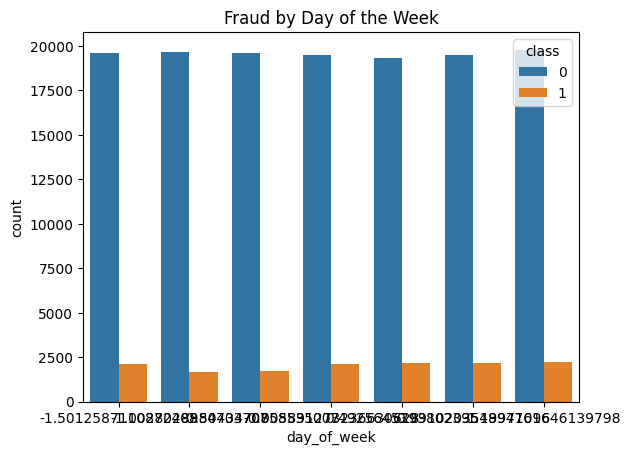

In [61]:
# Example: Group transactions by hour_of_day for analysis
hourly_fraud = merged_fraud_data_df.groupby('hour_of_day')['class'].mean()
print(hourly_fraud)

# Example: Visualize fraud occurrences by day of the week
sns.countplot(x='day_of_week', hue='class', data=merged_fraud_data_df)
plt.title('Fraud by Day of the Week')
plt.show()


In [62]:
merged_fraud_data_df[numerical_columns].head()

,purchase_value,age,transaction_frequency,velocity,hour_of_day,day_of_week
0,-0.160204,0.679914,0.0,-0.160204,-1.377455,0.991020
1,-1.142592,2.304476,0.0,-1.142592,-1.522122,-1.501259
2,-1.197169,2.304476,0.0,-1.197169,0.937208,-0.005891
3,0.385567,0.911994,0.0,0.385567,0.213876,-1.501259
4,0.112681,1.376155,0.0,0.112681,0.937208,-0.504347


In [68]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,key,transaction_frequency,...,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,732758368,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,350311387,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2621473820,1,1,0.0,...,False,False,False,False,False,False,False,False,True,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3840542443,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,415583117,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True


In [67]:
# One-hot encoding for categorical features
merged_fraud_data_df = pd.get_dummies(merged_fraud_data_df, columns=['sex', 'source','country', 'browser'], drop_first=True)


KeyError: "None of [Index(['sex', 'source', 'country', 'browser'], dtype='object')] are in the [columns]"

In [ ]:
# Sum up the occurrences of 1s for each one-hot encoded column
encoded_counts = merged_fraud_data_df[encoded_columns].sum()

# Plot the counts
plt.figure(figsize=(12, 8))
encoded_counts.plot(kind='bar')
plt.title('Distribution of One-Hot Encoded Categories')
plt.ylabel('Count of 1s')
plt.xlabel('Encoded Categories')
plt.xticks(rotation=90)
plt.show()


ValueError: Could not interpret value `source` for `x`. An entry with this name does not appear in `data`.

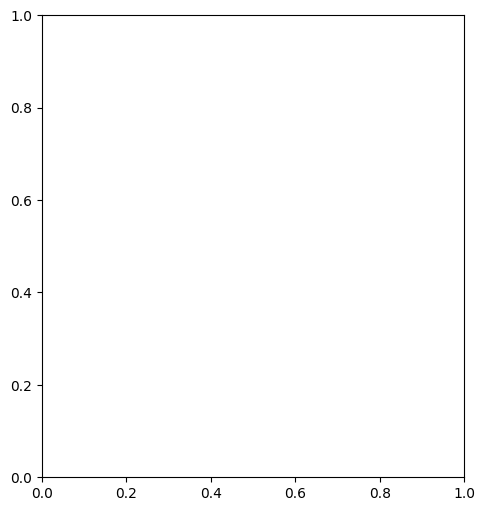

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot categorical variables (before encoding) to show their distribution
plt.figure(figsize=(12, 6))

# Plot for 'source'
plt.subplot(1, 2, 1)
sns.countplot(x='source', data=merged_fraud_data_df)
plt.title('Source Distribution')

# Plot for 'browser'
plt.subplot(1, 2, 2)
sns.countplot(x='browser', data=merged_fraud_data_df)
plt.title('Browser Distribution')

plt.tight_layout()
plt.show()

# Similarly, plot for 'sex'
sns.countplot(x='sex', data=merged_fraud_data_df)
plt.title('Sex Distribution')
plt.show()

# Plot distribution of country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=merged_fraud_data_df, order=merged_fraud_data_df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Country Distribution')
plt.show()


In [66]:
# One-hot encode categorical features including country
merged_fraud_data_df = pd.get_dummies(merged_fraud_data_df, columns=['source', 'browser', 'sex', 'country'], drop_first=True)

# Get the sum of the encoded columns
encoded_sums = merged_fraud_data_df.filter(like='source_').sum().append(
    merged_fraud_data_df.filter(like='browser_').sum()).append(
    merged_fraud_data_df.filter(like='sex_').sum()).append(
    merged_fraud_data_df.filter(like='country_').sum()
)

# Plot the one-hot encoded feature counts
plt.figure(figsize=(12, 6))
encoded_sums.plot(kind='bar')
plt.title('One-Hot Encoded Feature Counts (Source, Browser, Sex, Country)')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


KeyError: "None of [Index(['source', 'browser', 'sex', 'country'], dtype='object')] are in the [columns]"